In [185]:
library("ggplot2")
library("fitdistrplus")
library("repr")
library("evd")
library("VGAM")
library("flexsurv")

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)


Attaching package: 'flexsurv'

The following objects are masked from 'package:VGAM':

    dgompertz, pgompertz, qgompertz, rgompertz



In [205]:
df<-read.table("125_cc_1mA_graisse_postethanol_9.csv",skip = 47, header = F,sep = ",")
names(df)=c("Index","Time","Amps","Volts")
Index <- df$Index
Time <- df$Time
Amps <- df$Amps
Volts <- df$Volts
#Name<- list("norm", "lnorm", "exp" , "pois", "cauchy", "gamma", "logis", "nbinom", "geom", "beta", "weibull" , "invgamma","llogis", "invweibull", "pareto1", "pareto", "lgamma", "trgamma", "invtrgamma" )
fit1 <- fitdist(abs(Volts[75:575]),  "lnorm")  # we assume my_data ~ Normal(?,?)
fit2 <- fitdist(abs(Volts[75:575]), "gamma")
fit3 <- fitdist(abs(Volts[75:575]), "norm")  # we assume my_data ~ Normal(?,?)
fit4 <- fitdist(abs(Volts[75:575]), "logis")
fit5 <- fitdist(abs(Volts[75:575]), "beta")  # we assume my_data ~ Normal(?,?)
fit6 <- fitdist(abs(Volts[75:575]), "weibull")
fit7 <- fitdist(abs(Volts[75:575]), dgengamma,start=list(mu=0.1,sigma=0.1,Q=0.1))
fw<-gofstat(list(fit1,fit2,fit3,fit4,fit5,fit6,fit7))
fw$chisqpvalue
fw$kstest

1-mle-lnorm    2-mle-gamma     3-mle-norm    4-mle-logis     5-mle-beta 
  2.565508e-06   3.687491e-04  1.129263e-232  6.202084e-194   3.400097e-05 
 6-mle-weibull 7-mle-gengamma 
  2.994897e-03   2.866634e-03

1-mle-lnorm    2-mle-gamma     3-mle-norm    4-mle-logis     5-mle-beta 
"not rejected"     "rejected"     "rejected"     "rejected"     "rejected" 
 6-mle-weibull 7-mle-gengamma 
"not rejected" "not rejected"

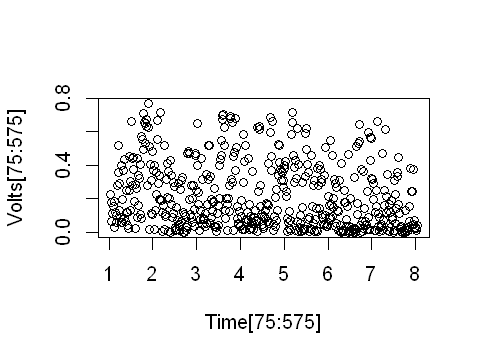

In [183]:
plot(Time[75:575],Volts[75:575])

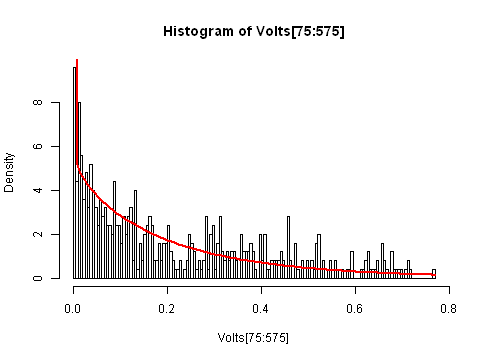

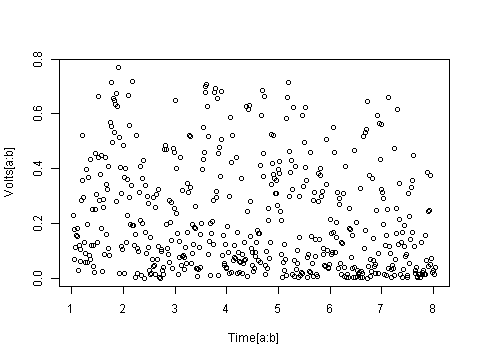

In [184]:

# curve(x, fit$estimate[1], fit$estimate[2]), col="red", lwd=2, add=T)
par(cex=0.6)
hist(Volts[75:575],breaks=200,prob=TRUE)
curve(dweibull(x, fit6$estimate[1], fit6$estimate[2]), col="red", lwd=2,, add=T)
a<-75
b<-575
plot(Time[a:b],Volts[a:b])
# plotdist(Volts[95:630], histo = TRUE, demp = TRUE)

In [20]:
?fitdist

In [69]:
Norm <- rnorm(10000, 1, 0.25)

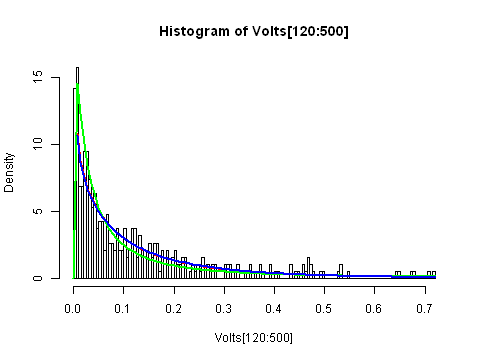

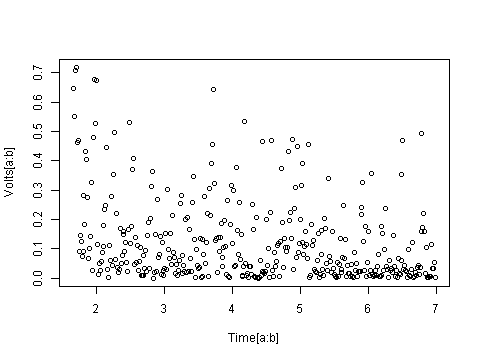

In [196]:

# curve(x, fit$estimate[1], fit$estimate[2]), col="red", lwd=2, add=T)
par(cex=0.6)
hist(Volts[120:500],breaks=200,prob=TRUE)
curve(dweibull(x, fit6$estimate[1], fit6$estimate[2]), col="red", lwd=2,, add=T)
curve(dlnorm(x, fit1$estimate[1], fit1$estimate[2]), col="green", lwd=2,, add=T)
curve(dgengamma(x, fit7$estimate[1], fit7$estimate[2],fit7$estimate[3]), col="blue", lwd=2,, add=T)
a<-120
b<-500
plot(Time[a:b],Volts[a:b])
# plotdist(Volts[95:630], histo = TRUE, demp = TRUE)

In [86]:
fw<-gofstat(fit)
fw$kstest

1-mle-norm 
"not rejected"

In [122]:
dgumbel(x, loc= 0, scale = 1, log = FALSE)

function (x, loc = 0, scale = 1, log = FALSE) 
{
    dgev(x, loc = loc, scale = scale, shape = 0, log = log)
}
<bytecode: 0x000000002a40e150>
<environment: namespace:evd>